### Problem Description

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.
        
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
        
Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.



### Data set details

   We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.
    
| Variable   |     Description  |
|-------------|-------------------------:|
| Item_Identifier | Unique product ID |
| Item_Weight  | Weight of product |
| Item_Fat_Content | Whether the product is low fat or not|
| Item_Visibility | The % of total display area of all products in a store allocated to the particular product|
| Item_Type | The category to which the product belongs |
| Item_MRP | Maximum Retail Price (list price) of the product |
| Outlet_Identifier | Unique store ID |
| Outlet_Establishment_Year | The year in which store was established |
| Outlet_Size | The size of the store in terms of ground area covered |
| Outlet_Location_Type | The type of city in which the store is located |
| Outlet_Type | Whether the outlet is just a grocery store or some sort of supermarket |
| Item_Outlet_Sales | Sales of the product in the particulat store. This is the outcome variable to be predicted.|

### Initial Hypothesis

H1: Item visibility, outlet size and outlet location can affect the sales.

### Data Exploration

In [1]:
## Read the data and summarize

import pandas as pd

data = pd.read_csv("Train.txt")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
# analyze the distribution of the data
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [3]:
print(data['Item_Fat_Content'].value_counts())

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


In [4]:
print(data['Item_Type'].value_counts())

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


In [5]:
print(data['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


In [6]:
print(data['Outlet_Type'].value_counts())

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


In [7]:
print(data['Outlet_Location_Type'].value_counts())

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(y=data['Item_Outlet_Sales'],x=data['Outlet_Type'])
plt.xticks(rotation=45)
#sns.boxplot(x=data['Outlet_Establishment_Year'],y=data['Outlet_Location_Type'])
## To Do
## 1. What can we infer from boxplot?

## Not much difference between these groups as boxes are on the same line
## Larger whisker line means wider distribution that is more scattered data
## The dotted points are the outlies which are away from the box (1.5 times)

## 2. Remove nan rows
## 3. Grouping and box plots - describe the inference

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

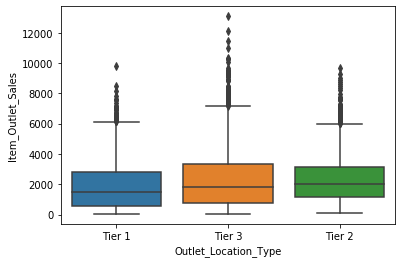

In [9]:
sns.boxplot(x = data['Outlet_Location_Type'],y = data['Item_Outlet_Sales'])
## Tier 2 and 3 has better sales than Tier 1 outlets

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

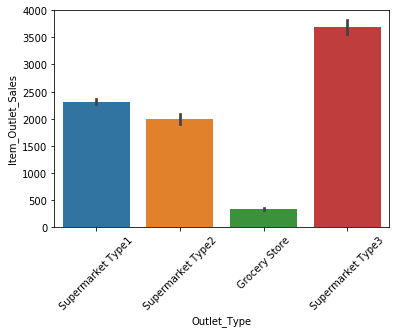

In [10]:
sns.barplot(x=data['Outlet_Type'],y=data['Item_Outlet_Sales'])
plt.xticks(rotation=45)

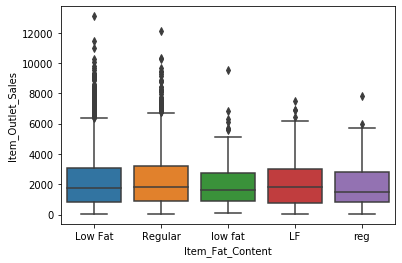

In [11]:
sns.boxplot(y=data['Item_Outlet_Sales'],x=data['Item_Fat_Content'])

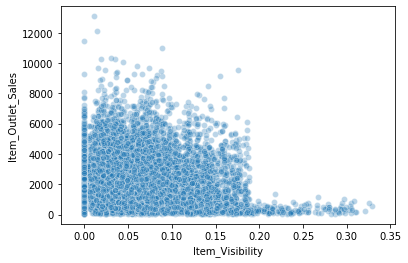

In [12]:
#sns.scatterplot(x = data['Item_MRP'],y = data['Item_Outlet_Sales'],alpha = 0.3)
sns.scatterplot(x = data['Item_Visibility'],y = data['Item_Outlet_Sales'],alpha = 0.3)

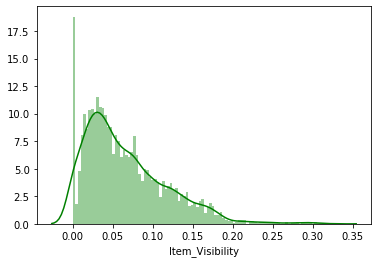

In [13]:
# Distribution plot of item visibility
sns.distplot(data['Item_Visibility'], color='g', bins=100, hist_kws={'alpha':0.4})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

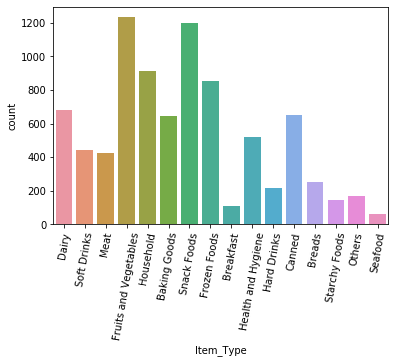

In [14]:
sns.countplot(x=data['Item_Type'])
plt.xticks(rotation=80)

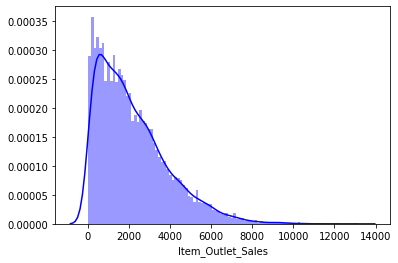

In [15]:
# Distribution of the response variable. We can observe that the data is righlty skewed.
sns.distplot(data['Item_Outlet_Sales'], color='b', bins=100, hist_kws={'alpha':0.4})

In [16]:
## Correlation between variables
import numpy as np
numericals = data.select_dtypes(include = [np.number])
correlations = numericals.corr()

In [17]:
correlations

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


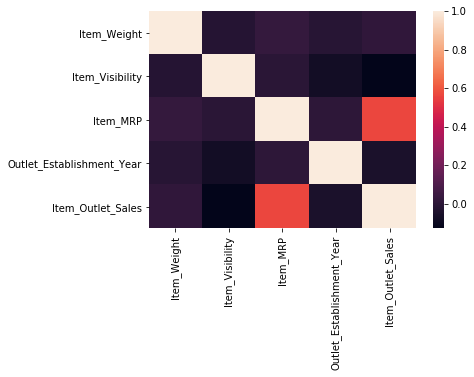

In [18]:
## Represent the correlations using seaborn heatmap
sns.heatmap(correlations)
## Item_MRP has more correlation to the sales and item_visibility has the less correlation value

## Data Preprocessing

In [19]:
## Check for the NaN value counts
print(data.isnull().sum())
## We can observe thar Item_Weight and Outlet_Size has NaN values
## How to deal with the missing values. Impute it with Mean pf the same item

###data['Item_Weight'] = data['Item_Weight'].replace(np.nan, data.describe()['Item_Weight']['mean'])
###data['Outlet_Size'] = data['Outlet_Size'].replace(np.nan,data['Outlet_Size'].mode()[0])

item_mean_weight = data.pivot_table(values = 'Item_Weight',index = 'Item_Identifier')

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [20]:
#data[:][data['Item_Identifier']=='DRA12']

def replace_nan(columns):
    weight = columns[0]
    Id = columns[1]
    
    if pd.isna(weight):
        if len(np.array(item_mean_weight['Item_Weight'][item_mean_weight.index == Id]))!=0:
            #print(np.array(item_mean_weight['Item_Weight'][item_mean_weight.index == Id])[0])
            return np.array(item_mean_weight['Item_Weight'][item_mean_weight.index == Id][0])
        else:
            return 0.0
    else:
        return weight      
        
data['Item_Weight'] = data[['Item_Weight','Item_Identifier']].apply(replace_nan, axis = 1)

In [21]:
#item_mean_weight['Item_Weight'][item_mean_weight.index == 'FDN52']
#data['Item_Weight']
print(data.isnull().sum())

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [22]:
from scipy.stats import mode

outlet_size_mode = data.pivot_table(values = 'Outlet_Size',index = 'Outlet_Type',aggfunc=lambda x:x.mode())
print(outlet_size_mode)

                  Outlet_Size
Outlet_Type                  
Grocery Store           Small
Supermarket Type1       Small
Supermarket Type2      Medium
Supermarket Type3      Medium


In [23]:
def replace_nan_mode(col):
    size = col[0]
    type_ = col[1]
    #print(size,type_)
    if pd.isnull(size):
        #print("loop")
        #print(outlet_size_mode['Outlet_Size'][outlet_size_mode.index==type_][0])
        return outlet_size_mode['Outlet_Size'][outlet_size_mode.index==type_][0]
    else:
        return size

data['Outlet_Size'] = data[['Outlet_Size','Outlet_Type']].apply(replace_nan_mode,axis=1)

In [24]:
print(data.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [25]:
item_visibility_average = data.pivot_table(values='Item_Visibility',index='Item_Identifier')

In [26]:
data['Item_Visibility'].value_counts().head()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
Name: Item_Visibility, dtype: int64

In [27]:
## Item_visibility has 0 as more values
## Mean visibility of the Item is updated to the zero values
def update_visibility(cols):
    value = cols[0]
    Id = cols[1]
    if value==0:
        return item_visibility_average['Item_Visibility'][item_visibility_average.index==Id][0]
    else:
        return value
    
data['Item_Visibility'] = data[['Item_Visibility','Item_Identifier']].apply(update_visibility,axis=1)

print(data['Item_Visibility'].value_counts().head())

0.052234    4
0.076975    3
0.017361    3
0.089296    3
0.008082    3
Name: Item_Visibility, dtype: int64


In [28]:
print(data['Outlet_Establishment_Year'].value_counts())
# Given data is 2013 sales, so the year can be represent in terms of number of years since established
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
print(data['Outlet_Years'].describe())

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64
count    8523.000000
mean       15.168133
std         8.371760
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Years, dtype: float64


In [29]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [30]:
## Modify the Item identifier to the combined type from the Item Type
data['Item_Type_combine'] = data['Item_Identifier'].apply(lambda x:x[0:2])
data['Item_Type_combine'] = data['Item_Type_combine'].map({'FD':'Food','NC':'Non Consumable','DR':'Drinks'})
print(data['Item_Type_combine'].value_counts())

Food              6125
Non Consumable    1599
Drinks             799
Name: Item_Type_combine, dtype: int64


In [31]:
print(data['Item_Fat_Content'].value_counts())
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
print(data['Item_Fat_Content'].value_counts())

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [32]:
## Non consumable item type can represent as non edible so that a specific fat content information can be removed
data.loc[data['Item_Type_combine']=='Non Consumable','Item_Fat_Content'] = 'Non Edible'

In [33]:
print(data['Item_Fat_Content'].value_counts())

Low Fat       3918
Regular       3006
Non Edible    1599
Name: Item_Fat_Content, dtype: int64


### Feature Transformation

In [34]:
# Importance of a product in a given store based on the Item Visibility

mean_ratio = lambda x : x['Item_Visibility']/item_visibility_average['Item_Visibility'][item_visibility_average.index == x['Item_Identifier']][0]

data['Item_Outlet_Importance'] = data.apply(mean_ratio, axis=1)
print(data['Item_Outlet_Importance'].describe())

count    8523.000000
mean        1.061715
std         0.237149
min         0.678833
25%         0.903570
50%         1.000000
75%         1.055863
max         2.729420
Name: Item_Outlet_Importance, dtype: float64


In [35]:
# One Hot Encoding for the categorical variables
from sklearn.preprocessing import LabelEncoder
label_en  = LabelEncoder()
# data['Outlet_Identifier'].value_counts()
# label_en.fit_transform(data['Outlet_Identifier'])

categorical_vars = ['Item_Fat_Content','Item_Type_combine','Outlet_Identifier','Outlet_Type','Outlet_Size','Outlet_Location_Type']

for cat_var in categorical_vars:
    data[cat_var] = label_en.fit_transform(data[cat_var])
    
## one hot encoding of this categorical variables
data = pd.get_dummies(data, columns = categorical_vars)

In [36]:
data.dtypes
## We can remove the redundant columns and transformed columns
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [37]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Outlet_Importance,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2
0,FDA15,9.3,0.016047,249.8092,3735.1380,14,0.922960,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,443.4228,4,1.003057,0,0,1,...,0,0,1,0,0,1,0,0,0,1
2,FDN15,17.5,0.016760,141.6180,2097.2700,14,0.831990,1,0,0,...,0,1,0,0,0,1,0,1,0,0
3,FDX07,19.2,0.015274,182.0950,732.3800,15,1.000000,0,0,1,...,1,0,0,0,0,0,1,0,0,1
4,NCD19,8.93,0.008082,53.8614,994.7052,26,1.000000,0,1,0,...,0,1,0,0,1,0,0,0,0,1


### Machine Learning Model - Performance Comparison

In [38]:
## Split the data into train and test
data_y = data['Item_Outlet_Sales']
data.drop(['Item_Outlet_Sales'],axis=1,inplace=True)

In [39]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data, data_y, test_size = 0.3, random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(5966, 32) (2557, 32) (5966,) (2557,)


In [93]:
from sklearn.model_selection import KFold
from sklearn import metrics

cv = KFold(n_splits=5,random_state=42,shuffle=True)
IDs = ['Item_Identifier']

def generic_model_fit(classifier, data, data_y, IDs):
    
    data_x = data.drop(columns=IDs, axis=1)
    rmse_scores = []
    
    for train_ix,test_ix in cv.split(data_y):
        
        train_x, test_x, train_y, test_y = data_x.iloc[train_ix], data_x.iloc[test_ix], data_y.iloc[train_ix], data_y.iloc[test_ix]
        classifier.fit(train_x, train_y)
    
        test_pred = classifier.predict(test_x)
        rmse_scores.append(np.sqrt(metrics.mean_squared_error(test_pred,test_y)))
    
    return (np.mean(rmse_scores))

In [99]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
print("Classifier: Logistic Regression")
print('RMSE : {}'.format(generic_model_fit(classifier, data, data_y, IDs)))

Classifier: Logistic Regression
RMSE : 1129.6281259164941


In [100]:
from sklearn.linear_model import Ridge
classifier = Ridge(alpha=0.05,normalize=True)
print("Classifier: Ridge Regression")
print('RMSE : {}'.format(generic_model_fit(classifier, data, data_y, IDs)))

Classifier: Ridge Regression
RMSE : 1130.6662201744584


In [103]:
from sklearn.tree import DecisionTreeRegressor
classifier = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
print("Classifier: Decision Tree Regression")
print('RMSE : {}'.format(generic_model_fit(classifier, data, data_y, IDs)))

Classifier: Decision Tree Regression
RMSE : 1095.924196294288
